In [2]:
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

* __event__ - an outcome or occurence that has a probability assigned to it
    * Any outcome where you can say how likely it is to occur

In [6]:
roulette_slots = 38
seven_pockets = 1
print(f'Likelihood of getting 7: {seven_pockets/roulette_slots}')

Likelihood of getting 7: 0.02631578947368421


On a scale of 0 to 1, the probability of getting 7 on a routelle wheel is 0.026. Not impossible, but not very likely

$Probability = \frac{number\,of\,ways\,of\,winning}{number\,of\,possible\,outcomes}$

For the probability of some event $A$: $P(A) = \frac{n(A)}{n(S)}$

* __$S$__ - possibility space / sample space. All possible outcomes. $A$ is a subset of $S$
* __$A'$__ - complementary event. The event that does not occur


$P(A) + P(A') = 1$

Therefore...

$P(A') = 1 - P(A)$

In [7]:
nine_pockets = 1
print(f'Getting 9: {nine_pockets/roulette_slots}')
green_pockets = 2
print(f'Getting Green: {green_pockets/roulette_slots}')
black_pockets = (roulette_slots - green_pockets) / 2
print(f'Getting Black: {black_pockets/roulette_slots}')
thirtyeight_pockets = 0
print(f'Getting 38: {thirtyeight_pockets/roulette_slots}')

Getting 9: 0.02631578947368421
Getting Green: 0.05263157894736842
Getting Black: 0.47368421052631576
Getting 38: 0.0


### No matter how unlikely an event is, if it's not impossible, it can still happen

$P(Black or Red) = P(Green')$


In [9]:
p_green = green_pockets/roulette_slots
p_black_or_red = 1 - p_green
print(f'Getting Red or Black: {p_black_or_red}')
red_or_black = 36
print(f'See?:{red_or_black/roulette_slots}')

Getting Red or Black: 0.9473684210526316
See?:0.9473684210526315


$P(Black\,or\,Red) = P(Black) + P(Red)$

In [11]:
red_pockets = 18
p_black_or_red = (black_pockets/roulette_slots) + (red_pockets/roulette_slots)
print(f'Getting Red or Black: {p_black_or_red}')

Getting Red or Black: 0.9473684210526315


## Summary So Far

* __Probability__: to find the probability of an event $A$, use $P(A) = \frac{n(A)}{n(S)}$
* __A'__: $A'$ is the complementary event of $A$. It's the probability that event $A$ does not occur: $P(A') = 1 - P(A)$

You can't always add together two probabilities to get the new probability

$P(Black\,or\,Even) = ?$

In [15]:
p_black = black_pockets / roulette_slots
black_pockets = 18
print(f'Getting Black: {p_black}')
even_slots = 18
p_even = even_slots / roulette_slots
print(f'Getting Even: {p_even}')
print(f'If I add them together... {p_black + p_even}')

# manually counting...
black_or_even_slots = 26
print(f'Black or Even: {black_or_even_slots / roulette_slots}')

Getting Black: 0.47368421052631576
Getting Even: 0.47368421052631576
If I add them together... 0.9473684210526315
Black or Even: 0.6842105263157895


* when events are __mutually exclusive__ only one of the two can occur. These types of events can be added together
* when events __intersect__, it's possible they can occur simultaneously.

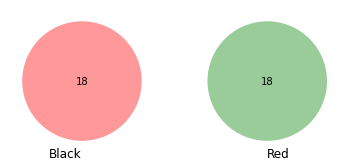

In [16]:
venn2(subsets=(black_pockets, red_pockets, 0), set_labels=('Black', 'Red'));

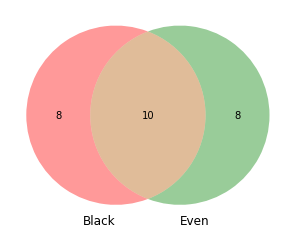

In [27]:
venn2(subsets=(8, 8, 10), set_labels=('Black', 'Even'));

$P(Black \cup Even) = P(Black) + P(Even) - P(Black \cap Even)$

* $\cap = intersection$ - and
* $\cup = union$ - or - __exhaustive__

More generally:

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$

In [20]:
p_black_or_even = p_black + p_even - (10/roulette_slots)
print(f'Black or Even: {p_black_or_even}')

Black or Even: 0.6842105263157894


* If $A$ and $B$ are __exclusive__, then $P(A \cap B) = 0$
* If $A$ and $B$ are __exhaustive__, then $P(A \cup B) = 1$

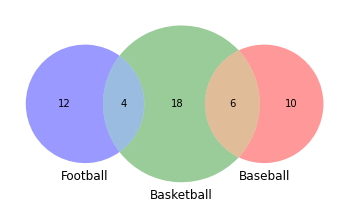

In [26]:
sports_enthusiasts = 50
baseball_only = 10
football_only = 12
basketball_only = 18
baseball_and_basketball = 6
football_and_basketball = 4
football_and_baseball = 0
all_sports = 0

venn3(
    subsets=(baseball_only, basketball_only, baseball_and_basketball, football_only, football_and_baseball, football_and_basketball, all_sports),
    set_labels=('Baseball', 'Basketball', 'Football')
);

total_baseball_players = 16
total_basketball_players = 28
total_football_players = 16

Football and Baseball are mutally exclusive

Football, Basketball, and Baseball are exhaustive

## Conditional Probabilities


### $P(Even\,given\,black) = \frac{Black\,and\,even}{Black}$

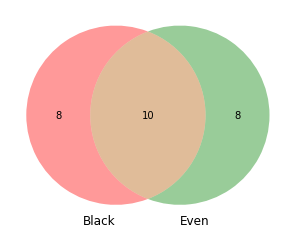

In [28]:
venn2(subsets=(8, 8, 10), set_labels=('Black', 'Even'));

In [29]:
num_black = 18
num_even_and_black = 10
p_even_given_black = num_even_and_black / num_black
print(f'Even given black: {p_even_given_black}')

Even given black: 0.5555555555555556


* __conditional probabilities__ - the probability of one even occurring relative to another occurring
    * $|$ - 'given'

### $P(A | B) = \frac{P(A \cap B)}{P(B)}$

We can use this equation to find $P(A \cap B)$

$P(A \cap B) = P(A | B) \times P(B)$

Or even

$P(B \cap A) = P(B | A) \times P(A)$

## Probability Tree

In [3]:
import pydotplus.graphviz as gv
from IPython.display import SVG

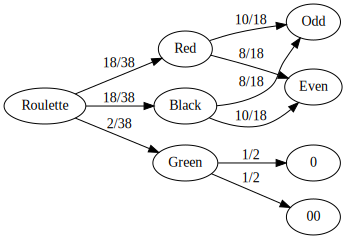

In [50]:
graph = gv.Graph(rankdir='LR')
node = gv.Node('Roulette')
graph.add_node(node)
graph.add_node(gv.Node('Black'))
graph.add_node(gv.Node('Red'))
graph.add_node(gv.Node('Green'))
graph.add_edge(gv.Edge('Roulette', 'Black', label = '18/38'))
graph.add_edge(gv.Edge('Roulette', 'Red', label='18/38'))
graph.add_edge(gv.Edge('Roulette', 'Green', label='2/38'))
graph.add_node(gv.Node('Odd'))
graph.add_node(gv.Node('Even'))
graph.add_edge(gv.Edge('Black', 'Odd', label='8/18'))
graph.add_edge(gv.Edge('Black', 'Even', label='10/18'))
graph.add_edge(gv.Edge('Red', 'Odd', label='10/18'))
graph.add_edge(gv.Edge('Red', 'Even', label='8/18'))
graph.add_node(gv.Node('0'))
graph.add_node(gv.Node('00'))
graph.add_edge(gv.Edge('Green', '0', label='1/2'))
graph.add_edge(gv.Edge('Green', '00', label='1/2'))
t = gv.graph_from_dot_data(graph.to_string())
t.write_svg('roulette.svg')
SVG('roulette.svg')

* The first set of branches shows the probability for each outcome
    * For example, the probability of getting black is 18/38, or 0.474
* The second set of branches shows the probability of outcomes __given the outcome of the branch it is linked to__
    * For example, the probability of getting an odd pocket given we know it's black is 8/18, or 0.444

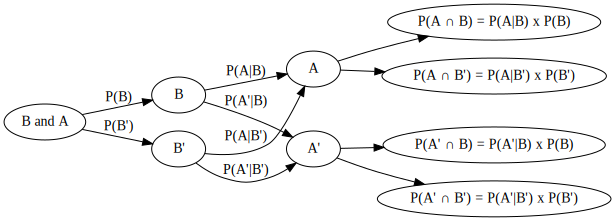

In [91]:
graph = gv.Graph(rankdir='LR')

graph.add_node(gv.Node('B and A'))
graph.add_node(gv.Node('B'))
graph.add_node(gv.Node("B'"))
graph.add_edge(gv.Edge('B and A', 'B', label='P(B)'))
graph.add_edge(gv.Edge('B and A', "B'", label="P(B')"))

graph.add_node(gv.Node('A'))
graph.add_node(gv.Node("A'"))
graph.add_edge(gv.Edge('B', 'A', label='P(A|B)'))
graph.add_edge(gv.Edge('B', "A'", label="P(A'|B)"))

graph.add_edge(gv.Edge("B'", 'A', label="P(A|B')"))
graph.add_edge(gv.Edge("B'", "A'", label="P(A'|B')"))

graph.add_node(gv.Node('P(A ∩ B) = P(A|B) x P(B)'))
graph.add_edge(gv.Edge('A', 'P(A ∩ B) = P(A|B) x P(B)'))

graph.add_node(gv.Node("P(A ∩ B') = P(A|B') x P(B')"))
graph.add_edge(gv.Edge('A', "P(A ∩ B') = P(A|B') x P(B')"))

graph.add_node(gv.Node("P(A' ∩ B) = P(A'|B) x P(B)"))
graph.add_edge(gv.Edge("A'", "P(A' ∩ B) = P(A'|B) x P(B)"))

graph.add_node(gv.Node("P(A' ∩ B') = P(A'|B') x P(B')"))
graph.add_edge(gv.Edge("A'", "P(A' ∩ B') = P(A'|B') x P(B')"))

t = gv.graph_from_dot_data(graph.to_string())
t.write_svg('b_and_a.svg')
SVG('b_and_a.svg')

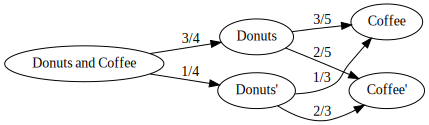

In [61]:
graph = gv.Graph(rankdir='LR')

donuts_and_coffee = 'Donuts and Coffee'
graph.add_node(gv.Node(donuts_and_coffee))

donuts = 'Donuts'
not_donuts = "Donuts'"

graph.add_node(gv.Node(donuts))
graph.add_node(gv.Node(not_donuts))
graph.add_edge(gv.Edge(donuts_and_coffee, donuts, label='3/4'))
graph.add_edge(gv.Edge(donuts_and_coffee, not_donuts, label='1/4'))

coffee = 'Coffee'
not_coffee = "Coffee'"

graph.add_node(gv.Node(coffee))
graph.add_node(gv.Node(not_coffee))

graph.add_edge(gv.Edge(donuts, coffee, label='3/5'))
graph.add_edge(gv.Edge(donuts, not_coffee, label='2/5'))

graph.add_edge(gv.Edge(not_donuts, coffee, label='1/3'))
graph.add_edge(gv.Edge(not_donuts, not_coffee, label='2/3'))

t = gv.graph_from_dot_data(graph.to_string())
filename = 'donuts_and_coffee.svg'
t.write_svg(filename)
SVG(filename)

### Working with Trees

1. Work out the levels
    * For example, if you need the probability of $P(A | B)$, you'll probably need the first level to cover $B$, and the second level $A$
2. Fill in what you know
3. Remember that each set of branches sums to 1
    * Remember, $P(A) = 1 - P(A')$
4. Remember your formula
    * For most other probabilities, use: $P(A | B) = \frac{P(A \cap B)}{P(B)}$

In [24]:
from fractions import Fraction

p_not_donuts = 1 / 4
p_not_donuts_and_coffee = (1 / 4) * (1 / 3)
p_donuts_given_no_coffee = 2 / 5

p_donuts_and_coffee = (3 / 4) * (3 / 5)
p_coffee = p_not_donuts_and_coffee + p_donuts_and_coffee
p_coffee_given_donuts = p_donuts_and_coffee / p_coffee

def num_to_frac(i):
    return Fraction(i).limit_denominator()

print(f"P(Donuts') = {num_to_frac(p_not_donuts)}")
print(f"P(Donuts' ∩ Coffee) = {num_to_frac(p_not_donuts_and_coffee)}")
print(f"P(Coffee'|Donuts) = {num_to_frac(p_donuts_given_no_coffee)}")
print(f"P(Coffee) = {num_to_frac(p_coffee)}")
print(f"P(Donuts|Coffee) = {num_to_frac(p_coffee_given_donuts)}")

P(Donuts') = 1/4
P(Donuts' ∩ Coffee) = 1/12
P(Coffee'|Donuts) = 2/5
P(Coffee) = 8/15
P(Donuts|Coffee) = 27/32


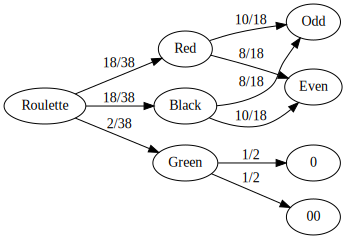

In [82]:
SVG('roulette.svg')

Even though this chart gives us $P(Even | Black)$, we can use it to get to $P(Black | Even)$ by using the formula $P(Black | Even) = \frac{P(Black \cap Even)}{P(Even)}$

1. Finding $P(Black \cap Even)$
    * _Hint_: $\cap$ is _commutative_, so $P(Black \cap Even)$ = $P(Even \cap Black)$

In [85]:
p_black = (18 / 38)
p_even_given_black = (10 / 18)
p_even_and_black = p_black * p_even_given_black 
print(f"P(Black ∩ Even) = {num_to_frac(p_even_and_black)}")

P(Black ∩ Even) = 5/19


2. Finding $P(Even)$
    * Consider all the ways you can get Even, which are:
        * A pocket that is both red and even
        * A pocket that is both black and even
    * Therefore, we can get there by: $P(Black \cap Even) + P(Red \cap Even)$

In [87]:
p_red = (18 / 38)
p_even_given_red = (8 / 18)
p_even_and_red = p_red * p_even_given_red
p_even = p_even_and_black + p_even_and_red
print(f"P(Even) = {num_to_frac(p_even)}")

P(Even) = 9/19


3. Finding $P(Black|Even)$
    * This is where we can utilize $\frac{P(Black \cap Even)}{P(Even)}$
    * Expanded out:
    
### $\frac{P(Black) \times P(Even | Black)}{P(Black) \times P(Even | Black) + P(Red) \times P(Even | Red)}$

In [88]:
p_black_given_even = p_even_and_black / p_even
print(f"P(Black | Even) = {num_to_frac(p_black_given_even)}")

P(Black | Even) = 5/9


## $P(A | B) = \frac{P(A \cap B)}{P(B)}$

1. $P(A \cap B) = P(A) \times P(B | A)$
2. $P(B) = P(A \cap B) + P(A' \cap B)$
    1. $P(A \cap B) = P(A) \times P(B | A)$
    2. $P(A' \cap B) = P(A') \times P(B | A')$
    3. $P(B) = P(A) \times P(B | A) + P(A') \times P(B | A')$

The $P(B)$ part is known as the __Law of Total Probability__

The completely expanded formula:

## $P(A | B) = \frac{P(A) \times P(B | A)}{P(A) \times P(B | A) + P(A') \times P(B | A')}$

is called __Bayes' Theorem__. It gives you a means of finding reverse conditional probabilities

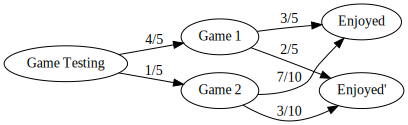

In [92]:
graph = gv.Graph(rankdir='LR')

game_testing = 'Game Testing'
graph.add_node(gv.Node(game_testing))

game1 = 'Game 1'
game2 = 'Game 2'

graph.add_node(gv.Node(game1))
graph.add_node(gv.Node(game2))
graph.add_edge(gv.Edge(game_testing, game1, label='4/5'))
graph.add_edge(gv.Edge(game_testing, game2, label='1/5'))

enjoyed = 'Enjoyed'
not_enjoyed = "Enjoyed'"

graph.add_node(gv.Node(enjoyed))
graph.add_node(gv.Node(not_enjoyed))

graph.add_edge(gv.Edge(game1, enjoyed, label='3/5'))
graph.add_edge(gv.Edge(game1, not_enjoyed, label='2/5'))

graph.add_edge(gv.Edge(game2, enjoyed, label='7/10'))
graph.add_edge(gv.Edge(game2, not_enjoyed, label='3/10'))

t = gv.graph_from_dot_data(graph.to_string())
filename = 'game_testing.svg'
t.write_svg(filename)
SVG(filename)

$P(Game\,2|Enjoyed) = \frac{P(Game\,2 \cap Enjoyed)}{P(Enjoyed)}$

In [94]:
p_game2 = 1 / 5
p_enjoyed_given_game2 = 7 / 10
p_game2_and_enjoyed = p_game2 * p_enjoyed_given_game2

p_game1 = 4/5
p_enjoyed_given_game1 = 3/5
p_game1_and_enjoyed = p_game1 * p_enjoyed_given_game1

p_enjoyed = p_game2_and_enjoyed + p_game1_and_enjoyed

p_game2_given_enjoyed = p_game2_and_enjoyed / p_enjoyed

print(f"P(Game 2|Enjoyed) = {p_game2_given_enjoyed}")

P(Game 2|Enjoyed) = 0.2258064516129032


## Summary So Far

### Law of Total Probability

If you have two events $A$ and $B$, then

$$
P(B) = P(B \cap A) + P(B \cap A') = P(A) \times P(B | A) + P(A') \times P(B | A')
$$

The Law of Total Proability is the denominator of Bayes' Theorem

### Bayes' Theorem

If you have $n$ mutually exclusive and exhaustive events, $A$, through to $A_n$, and $B$ is another event, then

$$
P(A | B) = \frac{P(A) \times P(B | A)}{P(A) \times P(B | A) + P(A') \times P(B | A')}
$$

# Dependent Events

The likelihood of an event happening twice in a row?

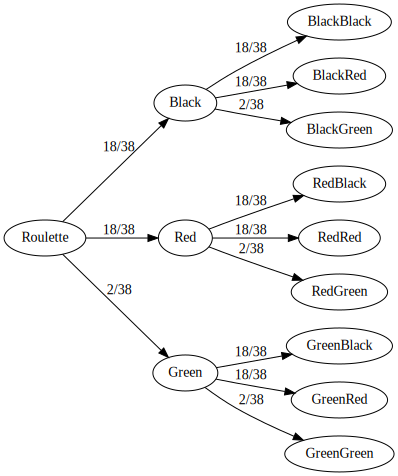

In [8]:
graph = gv.Graph(rankdir='LR')
graph.add_node(gv.Node('Roulette'))
graph.add_node(gv.Node('Black'))
graph.add_node(gv.Node('Red'))
graph.add_node(gv.Node('Green'))
graph.add_edge(gv.Edge('Roulette', 'Black', label = '18/38'))
graph.add_edge(gv.Edge('Roulette', 'Red', label='18/38'))
graph.add_edge(gv.Edge('Roulette', 'Green', label='2/38'))

graph.add_node(gv.Node('BlackBlack'))
graph.add_node(gv.Node('BlackRed'))
graph.add_node(gv.Node('BlackGreen'))
graph.add_edge(gv.Edge('Black', 'BlackBlack', label = '18/38'))
graph.add_edge(gv.Edge('Black', 'BlackRed', label='18/38'))
graph.add_edge(gv.Edge('Black', 'BlackGreen', label='2/38'))


graph.add_node(gv.Node('RedBlack'))
graph.add_node(gv.Node('RedRed'))
graph.add_node(gv.Node('RedGreen'))
graph.add_edge(gv.Edge('Red', 'RedBlack', label = '18/38'))
graph.add_edge(gv.Edge('Red', 'RedRed', label='18/38'))
graph.add_edge(gv.Edge('Red', 'RedGreen', label='2/38'))

graph.add_node(gv.Node('GreenBlack'))
graph.add_node(gv.Node('GreenRed'))
graph.add_node(gv.Node('GreenGreen'))
graph.add_edge(gv.Edge('Green', 'GreenBlack', label = '18/38'))
graph.add_edge(gv.Edge('Green', 'GreenRed', label='18/38'))
graph.add_edge(gv.Edge('Green', 'GreenGreen', label='2/38'))


t = gv.graph_from_dot_data(graph.to_string())
filename = 'roulette_dependent.svg'
t.write_svg(filename)
SVG(filename)

* If events affect each other, they are <u>dependent</u>
    * $P(Even | Black) = 10/18$
    * $P(Even) = 18/38$
    * The knowledge that we have that the pocket is black changes the probability. These two events are __dependent__
* If events do not affect each other, they are <u>independent</u>
    * $P(Black) = 18/38$
    * $P(Black | Black) = 18/38$
    * These two probabilities have the same value. The probability of getting a black pocket in this game has no bearing on the probability of of getting black in the next game. These events are __independent__
    * In other words $P(A | B) = P(A)$ for independent events
    
Therefore, for independent events:

$$
P(A) = \frac{P(A \cap B)}{P(B)}
$$

and

$$
P(A \cap B) = P(A) \times P(B)
$$

* If $A$ and $B$ are exclusive, they can't be independent, and if they are independent, they can't be mutually exclusive!

In [107]:
p_black = 18/38
p_black_and_black = p_black * p_black
print(f'P(Black ∩ Black) = {p_black_and_black}')

P(Black ∩ Black) = 0.22437673130193903


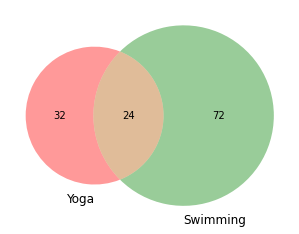

In [123]:
participants = 96
yoga = 32
swimming = 72
both = 24

venn2(subsets=(yoga, swimming, both), set_labels=('Yoga', 'Swimming'));

Yoga and Swimming: 0.25
Yoga and swimming 2: 0.25
Both: 0.25


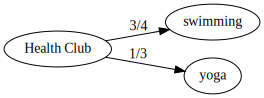

In [131]:
p_yoga = yoga / 96
p_swimming = swimming / 96

p_yoga_and_swimming = p_yoga * p_swimming
p_yoga_and_swimming

p_yoga_and_swimming2 = p_swimming * (both / 96)

print(f"Yoga and Swimming: {p_yoga_and_swimming}")
# print(f"Yoga and swimming 2: {p_yoga_and_swimming2 / p_swimming}")

print(f"Both: {both / 96}")


# $P(Yoga|Swimming) = \frac{P(Yoga \cap Swimming)}{P(Swimming)}$


graph = gv.Graph(rankdir='LR')
club = 'Health Club'
graph.add_node(gv.Node(club))

swim = 'swimming'
yo = 'yoga'
graph.add_node(gv.Node(swim))
graph.add_node(gv.Node(yo))
graph.add_edge(gv.Edge(club, swim, label=f"{num_to_frac(p_swimming)}"))
graph.add_edge(gv.Edge(club, yo, label=f"{num_to_frac(p_yoga)}"))

t = gv.graph_from_dot_data(graph.to_string())
filename = 'health_club.svg'
t.write_svg(filename)
SVG(filename)

* P(Yoga) * P(Swimming) = P(Both)

So they're independent

* Throwing a coin and getting heads twice in a row: Independent
* Removing socks from a drawer until you find a matching pair: Dependent
* Choosing chocolates at random from a box and picking dark chocolates twice in a row: Dependent
* Choosing a card from a deck of cards, then choosing another one: Dependent
* Choosing a card from a deck of cards, putting the card back in the dec, and then choosing another one: Independent
* The eveng of getting rain given it's a Thursday: Independent

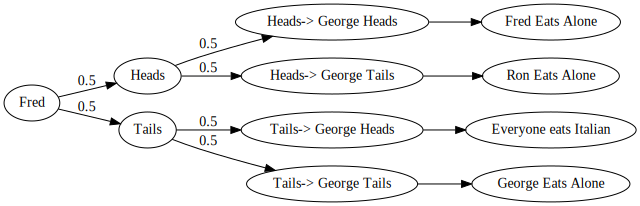

In [20]:
# fred -> heads -> diner, tails -> italian
# george -> heads -> italian, tails -> diner
# ron -> italian

graph = gv.Graph(rankdir='LR')
food = 'Food'
fred = 'Fred'
graph.add_node(gv.Node(fred))

heads = 'Heads'
tails = 'Tails'

graph.add_node(gv.Node(heads))
graph.add_node(gv.Node(tails))
graph.add_edge(gv.Edge(fred, heads, label='0.5'))
graph.add_edge(gv.Edge(fred, tails, label='0.5'))


graph.add_edge(gv.Edge(heads, 'Heads-> George Heads', label='0.5'))
graph.add_edge(gv.Edge(heads, 'Heads-> George Tails', label='0.5'))
graph.add_edge(gv.Edge(tails, 'Tails-> George Heads', label='0.5'))
graph.add_edge(gv.Edge(tails, 'Tails-> George Tails', label='0.5'))

graph.add_edge(gv.Edge('Heads-> George Heads', 'Fred Eats Alone'))
graph.add_edge(gv.Edge('Heads-> George Tails', 'Ron Eats Alone'))
graph.add_edge(gv.Edge('Tails-> George Heads', 'Everyone eats Italian'))
graph.add_edge(gv.Edge('Tails-> George Tails', 'George Eats Alone'))

t = gv.graph_from_dot_data(graph.to_string())
filename = 'food.svg'
t.write_svg(filename)
SVG(filename)

In [31]:
p_ron_italian_fred_italian_george_italian = 1 * 0.5 * 0.5
print(f'P(Ron Italian ∩ Fred Italian ∩ George Italian) = {p_ron_italian_fred_italian_george_italian}')
p_someone_eats_alone = (0.5 * 0.5) + (0.5 * 0.5) + (0.5 * 0.5)
print(f'P(Someone Eats Alone) = {p_someone_eats_alone}')

P(Ron Italian ∩ Fred Italian ∩ George Italian) = 0.25
P(Someone Eats Alone) = 0.75


In [33]:
# p_black = 18/38
# p_17 = 1/18
p_17_given_black = 1/18
print(f'P(17|Black) = {num_to_frac(p_17_given_black)}')
p_22 = 1/38
p_22_twice = p_22 * p_22
print(f'P(22|22) = {num_to_frac(p_22_twice)}')
p_red = 18/38
p_red_greater_than_4 = 1 - (1/18 + 1/18)
print(f'P(n>4|red) = {num_to_frac(p_red_greater_than_4)}')
p_1_2_3_4 = 4 * 1/38
print(f'P(1,2,3,4) = {num_to_frac(p_1_2_3_4)}')

P(17|Black) = 1/18
P(22|22) = 1/1444
P(n>4|red) = 8/9
P(1,2,3,4) = 2/19
